# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
import csv

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [204]:
# Function for opening zipped csv files which belongs to world bank's data service
def zipped_csv(x):
    with urlopen(x) as url:
        zfile = ZipFile(BytesIO(url.read()))
        
        api_name = None
        for i in zfile.namelist():
            if i[0]== "A":
                api_name = i
            else:
                continue
        
        zdata= zfile.open(str(api_name))
        
        data = pd.read_csv(zdata,skiprows=3)
        
    
    return data


In [205]:
#Literacy rates of women (percentage of females ages 15 and above)
literacy = zipped_csv("https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=csv")



In [ ]:
#Child mortality rate, under 5 year old. (per 1,000 live births)
mortality = zipped_csv("https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=csv")


In [ ]:
#Gini index (Economic Inequality)
gini = zipped_csv("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv")


**Question 1.1**

<AxesSubplot:>

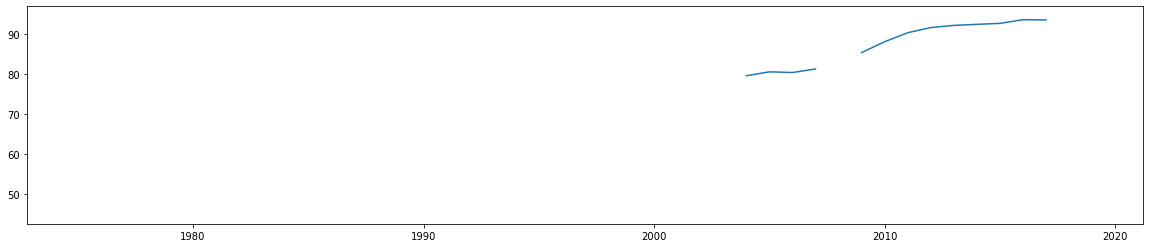

In [393]:

literacyTR = literacy.loc[literacy["Country Code"]=="TUR"]
(literacyTR.iloc[0,4:]).plot(figsize=(20,4))


<AxesSubplot:>

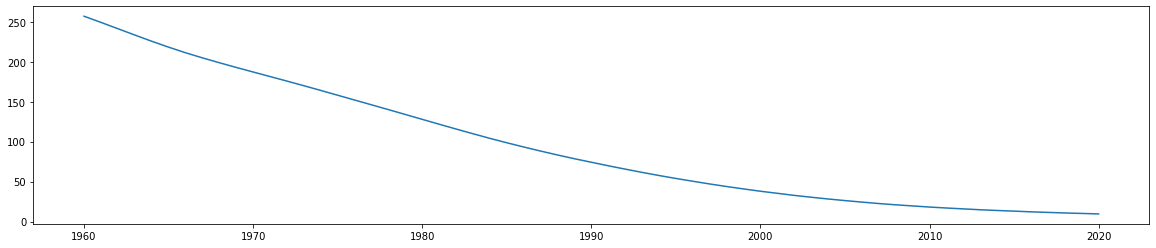

In [352]:
mortalityTR = mortality.loc[mortality["Country Code"]=="TUR"]
(mortalityTR.iloc[0,4:]).plot(figsize=(20,4))

<AxesSubplot:>

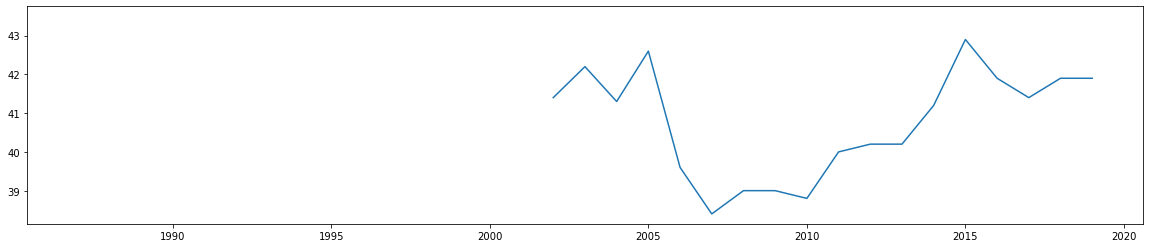

In [391]:
giniTR = gini.loc[gini["Country Code"]=="TUR"]
(giniTR.iloc[0,4:]).plot(figsize=(20,4))

**Question 1.2**

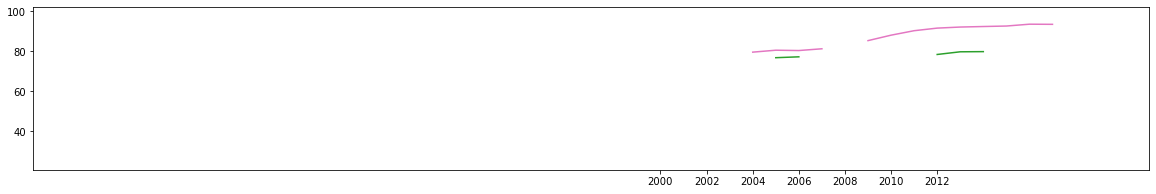

In [370]:


literacyGLO = literacy.loc[(literacy["Country Code"]== "TUR") | (literacy["Country Code"]== "GRC") | 
                            (literacy["Country Code"]== "BGR") | (literacy["Country Code"]== "ROU") |
                            (literacy["Country Code"]== "POL") | (literacy["Country Code"]== "SYR") |                       
                            (literacy["Country Code"]== "IRN")]

for i in range(7):
    (literacyGLO.iloc[i,4:]).plot(figsize=(20,3))

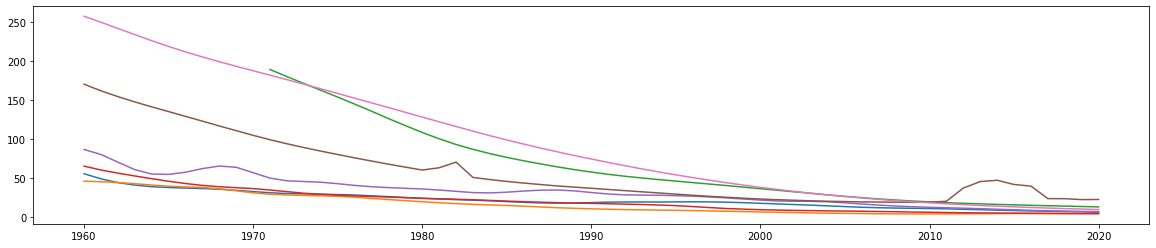

In [372]:
mortalityGLO = mortality.loc[(mortality["Country Code"]== "TUR") | (mortality["Country Code"]== "GRC") | 
                            (mortality["Country Code"]== "BGR") | (mortality["Country Code"]== "ROU") |
                            (mortality["Country Code"]== "POL") | (mortality["Country Code"]== "SYR") |                       
                            (mortality["Country Code"]== "IRN")]

for i in range(7):
    (mortalityGLO.iloc[i,4:]).plot(figsize=(20,4))

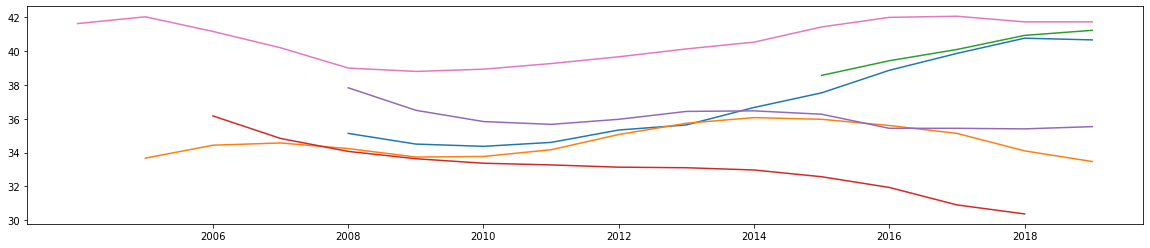

In [394]:
giniGLO = gini.loc[(gini["Country Code"]== "TUR") | (gini["Country Code"]== "GRC") | 
                            (gini["Country Code"]== "BGR") | (gini["Country Code"]== "ROU") |
                            (gini["Country Code"]== "POL") | (gini["Country Code"]== "SYR") |                       
                            (gini["Country Code"]== "IRN")]

for i in range(7):
    (giniGLO.iloc[i,4:]).plot(figsize=(20,4))

**Question 1.3**

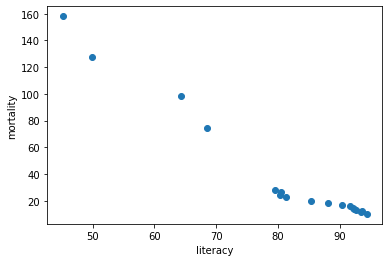

In [386]:

fliteracy_cmortality = plt.scatter(literacyTR.iloc[0,4:],mortalityTR.iloc[0,4:])
plt.xlabel("literacy")
plt.ylabel("mortality")

fliteracy_cmortality

**Question 1.4**

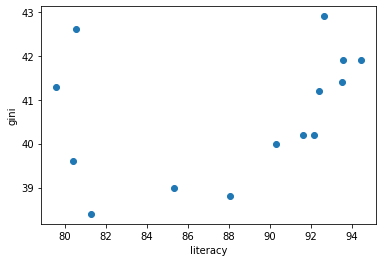

In [387]:

fliteracy_gini = plt.scatter(literacyTR.iloc[0,4:],giniTR.iloc[0,4:])
plt.xlabel("literacy")
plt.ylabel("gini")

fliteracy_gini

**Question 1.5**

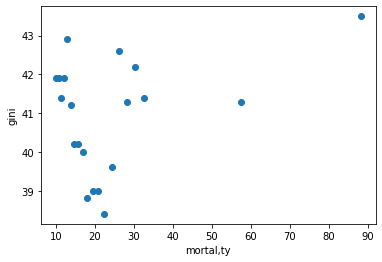

In [388]:

cmortality_gini = plt.scatter(mortalityTR.iloc[0,4:],giniTR.iloc[0,4:])
plt.xlabel("mortality")
plt.ylabel("gini")

cmortality_gini

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [351]:

with urlopen("https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx") as url:
    data = pd.read_excel(url.read())


data["latitude"]


0        410340555555556
1        410340555555556
2        410340555555556
3        410340555555556
4        410340555555556
              ...       
17077    410533333333333
17078    410533333333333
17079    410533333333333
17080    410533333333333
17081    410533333333333
Name: latitude, Length: 17082, dtype: object

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.